In [13]:
import sklearn
from numpy import where
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, Birch, OPTICS, SpectralClustering, DBSCAN, AffinityPropagation, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from numpy import unique
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm_notebook

In [14]:
molecules = pd.read_csv("ESOL_delaney-processed.csv", sep=",")
molecules_without_smiles = molecules[["ESOL predicted log solubility in mols per litre", "Minimum Degree", "Molecular Weight", "Number of H-Bond Donors", "Number of Rings", "Number of Rotatable Bonds", "Number of Rotatable Bonds", "Polar Surface Area", "measured log solubility in mols per litre"]]
molecules_without_smiles

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
0,-0.974,1,457.432,7,3,7,7,202.32,-0.770
1,-2.885,1,201.225,1,2,2,2,42.24,-3.300
2,-2.579,1,152.237,0,0,4,4,17.07,-2.060
3,-6.618,2,278.354,0,5,0,0,0.00,-7.870
4,-2.232,2,84.143,0,1,0,0,0.00,-1.330
...,...,...,...,...,...,...,...,...,...
1123,-2.608,1,197.381,0,0,0,0,0.00,-1.710
1124,-0.908,1,219.266,1,0,1,1,71.00,0.106
1125,-3.323,1,246.359,0,0,7,7,18.46,-3.091
1126,-2.245,1,72.151,0,0,1,1,0.00,-3.180


In [15]:
molecules_normalized = (molecules_without_smiles - molecules_without_smiles.mean())/molecules_without_smiles.std()
molecules_normalized

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
0,1.196631,-0.245266,2.467390,5.780125,1.220557,1.826104,1.826104,4.732338,1.087606
1,0.061307,-0.245266,-0.026398,0.274159,0.461996,-0.067136,-0.067136,0.208207,-0.119201
2,0.243101,-0.245266,-0.503222,-0.643502,-1.055126,0.690160,0.690160,-0.503139,0.472277
3,-2.156467,3.946560,0.724336,-0.643502,2.737678,-0.824432,-0.824432,-0.985566,-2.299086
4,0.449253,3.946560,-1.166014,-0.643502,-0.296565,-0.824432,-0.824432,-0.985566,0.820487
...,...,...,...,...,...,...,...,...,...
1123,0.225872,-0.245266,-0.063813,-0.643502,-1.055126,-0.824432,-0.824432,-0.985566,0.639227
1124,1.235841,-0.245266,0.149204,0.274159,-1.055126,-0.445784,-0.445784,1.021013,1.505457
1125,-0.198909,-0.245266,0.412913,-0.643502,-1.055126,1.826104,1.826104,-0.463856,-0.019508
1126,0.441530,-0.245266,-1.282738,-0.643502,-1.055126,-0.445784,-0.445784,-0.985566,-0.061961


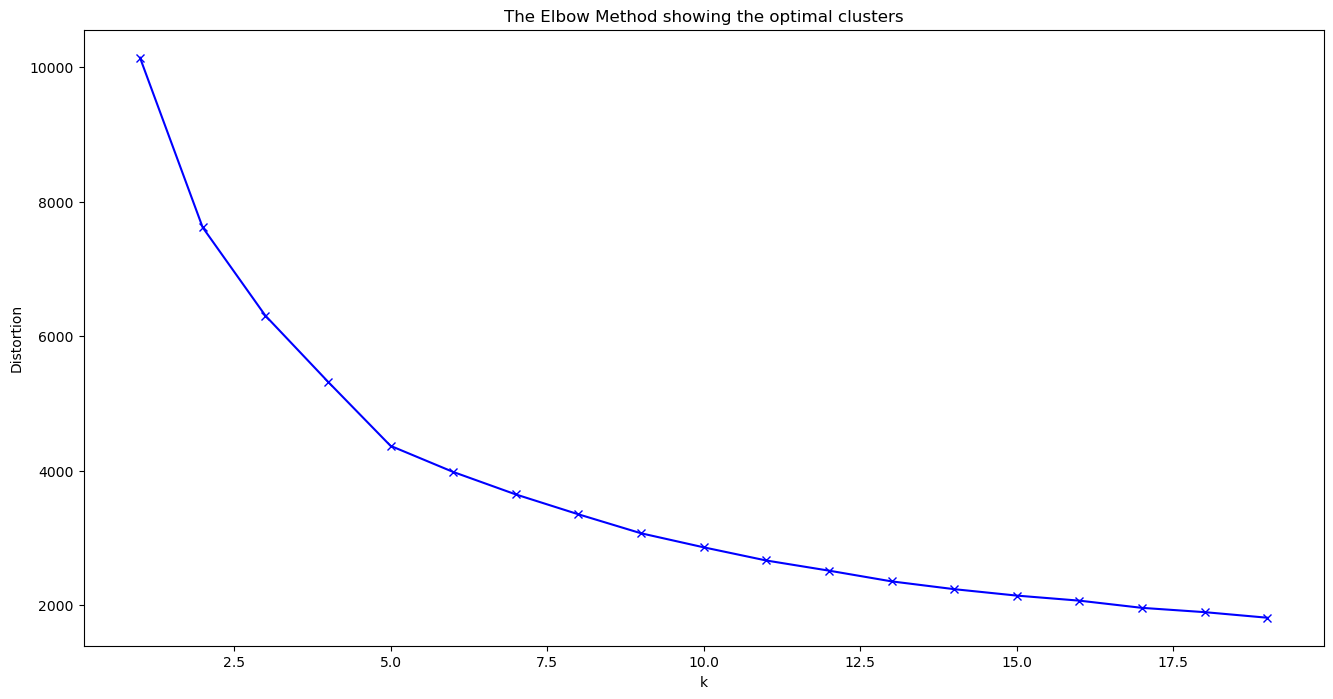

In [16]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 10)
    kmeanModel.fit(molecules_normalized)
    distortions.append(kmeanModel.inertia_)
# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

We can choose K=5 with the elbow method above

In [17]:
model = KMeans(n_clusters=5, n_init = 10)
model.fit(molecules_normalized)
yhat = model.fit_predict(molecules_normalized)
np.unique(yhat)

array([0, 1, 2, 3, 4], dtype=int32)

In [18]:
output = pd.DataFrame(index=['K-Means','DBSCAN','Birch'], columns=['SC','CH','DB'])

In [19]:
# Evaluating model's performance
labels = model.labels_
output.loc['K-Means','SC'] = metrics.silhouette_score(molecules_normalized, labels, metric='euclidean')
output.loc['K-Means','CH'] = metrics.calinski_harabasz_score(molecules_normalized, labels)
output.loc['K-Means','DB'] = metrics.davies_bouldin_score(molecules_normalized, labels)
output.loc['K-Means','number of clusters'] = len(np.unique(yhat))
output

,SC,CH,DB,number of clusters
K-Means,0.319377,370.754481,1.074313,5.0
DBSCAN,NaN,NaN,NaN,NaN
Birch,NaN,NaN,NaN,NaN


choice of the epsilon hyperparameter

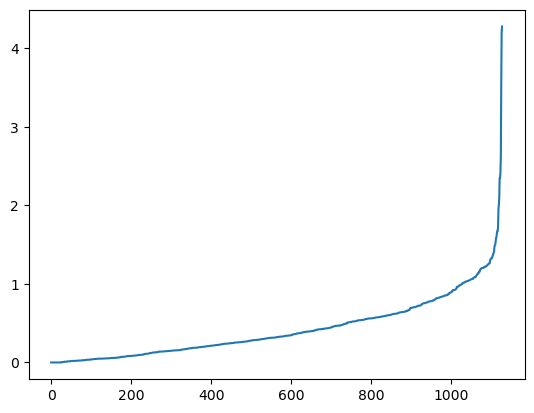

In [20]:
neighbors = NearestNeighbors(n_neighbors=18)
neighbors_fit = neighbors.fit(molecules_normalized)
distances, indices = neighbors_fit.kneighbors(molecules_normalized)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [21]:
ep = 1.2
min_sample = 18
model = DBSCAN(eps = ep, min_samples = min_sample)
yhat = model.fit_predict(molecules_normalized)
np.unique(yhat)

array([-1,  0,  1])

In [22]:
# Evaluating model's performance
labels = model.labels_
output.loc['DBSCAN','SC'] = metrics.silhouette_score(molecules_normalized, labels, metric='euclidean')
output.loc['DBSCAN','CH'] = metrics.calinski_harabasz_score(molecules_normalized, labels)
output.loc['DBSCAN','DB'] = metrics.davies_bouldin_score(molecules_normalized, labels)
output.loc['DBSCAN','number of clusters'] = len(np.unique(yhat)) - 1
output.loc['DBSCAN','eps'] = ep
output.loc['DBSCAN','min_samples'] = min_sample

output

,SC,CH,DB,number of clusters,eps,min_samples
K-Means,0.319377,370.754481,1.074313,5.0,NaN,NaN
DBSCAN,0.281903,120.236217,1.754494,2.0,1.2,18.0
Birch,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Obtain a value of bandwith
result = []
for bw in tqdm_notebook(np.linspace(2,4,4)):
    clust_model = MeanShift(bandwidth=bw)
    clust_model.fit(molecules_normalized)
    labels = clust_model.labels_
    result.append(metrics.silhouette_score(molecules_normalized, labels, metric='euclidean'))
res = pd.DataFrame(index=np.linspace(2,4,4))
res['Score'] = result
res

/var/folders/_t/26vz4yhd2lqb2866qhkw8htm0000gn/T/ipykernel_2794/1430376233.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for bw in tqdm_notebook(np.linspace(2,4,4)):


  0%|          | 0/4 [00:00<?, ?it/s]

,Score
2.000000,0.181986
2.666667,0.341432
3.333333,0.348766
4.000000,0.343173


In [24]:
#Obtain a more accurate value of bandwith
result = []
for bw in tqdm_notebook(np.linspace(2.5,4,10)):
    clust_model = MeanShift(bandwidth=bw)
    clust_model.fit(molecules_normalized)
    labels = clust_model.labels_
    result.append(metrics.silhouette_score(molecules_normalized, labels, metric='euclidean'))
res = pd.DataFrame(index=np.linspace(2.5,4,10))
res['Score'] = result
res

/var/folders/_t/26vz4yhd2lqb2866qhkw8htm0000gn/T/ipykernel_2794/4249972942.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for bw in tqdm_notebook(np.linspace(2.5,4,10)):


  0%|          | 0/10 [00:00<?, ?it/s]

,Score
2.500000,0.310644
2.666667,0.341432
2.833333,0.334777
3.000000,0.335420
3.166667,0.348766
3.333333,0.348766
3.500000,0.344039
3.666667,0.343173
3.833333,0.343173
4.000000,0.343173


In [25]:
bd=3.2
clust_model = MeanShift(bandwidth=bd)
yhat = clust_model.fit_predict(molecules_normalized)
result_meanshift = yhat
np.unique(yhat)

array([0, 1, 2, 3, 4, 5])

In [26]:
labels = clust_model.labels_
output.loc['Mean shift','SC'] = metrics.silhouette_score(molecules_normalized, labels, metric='euclidean')
output.loc['Mean shift','CH'] = metrics.calinski_harabasz_score(molecules_normalized, labels)
output.loc['Mean shift','DB'] = metrics.davies_bouldin_score(molecules_normalized, labels)
output.loc['Mean shift','number of clusters'] = len(np.unique(yhat))
output.loc['Mean shift','bandwith'] = bd
output

,SC,CH,DB,number of clusters,eps,min_samples,bandwith
K-Means,0.319377,370.754481,1.074313,5.0,NaN,NaN,NaN
DBSCAN,0.281903,120.236217,1.754494,2.0,1.2,18.0,NaN
Birch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean shift,0.348766,83.349734,0.755817,6.0,NaN,NaN,3.2


In [27]:
nc = 5
clust_model = Birch(n_clusters = nc)
yhat = clust_model.fit_predict(molecules_normalized)
np.unique(yhat)

array([0, 1, 2, 3, 4])

In [28]:
labels = clust_model.labels_
output.loc['Birch','SC'] = metrics.silhouette_score(molecules_normalized, labels, metric='euclidean')
output.loc['Birch','CH'] = metrics.calinski_harabasz_score(molecules_normalized, labels)
output.loc['Birch','DB'] = metrics.davies_bouldin_score(molecules_normalized, labels)
output.loc['Birch','number of clusters'] = nc
output

,SC,CH,DB,number of clusters,eps,min_samples,bandwith
K-Means,0.319377,370.754481,1.074313,5.0,NaN,NaN,NaN
DBSCAN,0.281903,120.236217,1.754494,2.0,1.2,18.0,NaN
Birch,0.277991,275.104806,1.163664,5.0,NaN,NaN,NaN
Mean shift,0.348766,83.349734,0.755817,6.0,NaN,NaN,3.2


In [29]:
ep = 1.2
min_sample=18
model = OPTICS(eps= ep, min_samples=min_sample)
yhat = model.fit_predict(molecules_normalized)
np.unique(yhat)

array([-1,  0,  1,  2,  3,  4])

In [30]:
labels = model.labels_
output.loc['OPTICS','SC'] = metrics.silhouette_score(molecules_normalized, labels, metric='euclidean')
output.loc['OPTICS','CH'] = metrics.calinski_harabasz_score(molecules_normalized, labels)
output.loc['OPTICS','DB'] = metrics.davies_bouldin_score(molecules_normalized, labels)
output.loc['OPTICS','number of clusters'] = len(np.unique(yhat)) - 1
output.loc['OPTICS','eps'] = ep
output.loc['OPTICS','min_samples'] = min_sample
output

,SC,CH,DB,number of clusters,eps,min_samples,bandwith
K-Means,0.319377,370.754481,1.074313,5.0,NaN,NaN,NaN
DBSCAN,0.281903,120.236217,1.754494,2.0,1.2,18.0,NaN
Birch,0.277991,275.104806,1.163664,5.0,NaN,NaN,NaN
Mean shift,0.348766,83.349734,0.755817,6.0,NaN,NaN,3.2
OPTICS,-0.104407,91.297366,1.483337,5.0,1.2,18.0,NaN


In [31]:
nc = 3
model = SpectralClustering(n_clusters = nc)
yhat = model.fit_predict(molecules_normalized)
np.unique(yhat)

array([0, 1, 2], dtype=int32)

In [32]:
labels = model.labels_
output.loc['Spectral Clustering','SC'] = metrics.silhouette_score(molecules_normalized, labels, metric='euclidean')
output.loc['Spectral Clustering','CH'] = metrics.calinski_harabasz_score(molecules_normalized, labels)
output.loc['Spectral Clustering','DB'] = metrics.davies_bouldin_score(molecules_normalized, labels)
output.loc['Spectral Clustering','number of clusters'] = nc
output

,SC,CH,DB,number of clusters,eps,min_samples,bandwith
K-Means,0.319377,370.754481,1.074313,5.0,NaN,NaN,NaN
DBSCAN,0.281903,120.236217,1.754494,2.0,1.2,18.0,NaN
Birch,0.277991,275.104806,1.163664,5.0,NaN,NaN,NaN
Mean shift,0.348766,83.349734,0.755817,6.0,NaN,NaN,3.2
OPTICS,-0.104407,91.297366,1.483337,5.0,1.2,18.0,NaN
Spectral Clustering,0.389883,102.672455,0.743059,3.0,NaN,NaN,NaN


In [33]:
result = []
for dpg in tqdm_notebook(np.linspace(0.5,0.99,10)):
    clust_model = AffinityPropagation(damping=dpg)
    clust_model.fit(molecules_normalized)
    labels = clust_model.labels_
    result.append(metrics.silhouette_score(molecules_normalized, labels, metric='euclidean'))
res = pd.DataFrame(index=np.linspace(0.5,0.99,10))
res['Score'] = result
res

/var/folders/_t/26vz4yhd2lqb2866qhkw8htm0000gn/T/ipykernel_2794/227158896.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for dpg in tqdm_notebook(np.linspace(0.5,0.99,10)):


  0%|          | 0/10 [00:00<?, ?it/s]

,Score
0.500000,0.245749
0.554444,0.243625
0.608889,0.244267
0.663333,0.245707
0.717778,0.245210
0.772222,0.244703
0.826667,0.241466
0.881111,0.242305
0.935556,0.372670
0.990000,0.372670


In [34]:
result = []
for dpg in tqdm_notebook(np.linspace(0.9,0.99,10)):
    clust_model = AffinityPropagation(damping=dpg)
    clust_model.fit(molecules_normalized)
    labels = clust_model.labels_
    result.append(metrics.silhouette_score(molecules_normalized, labels, metric='euclidean'))
res = pd.DataFrame(index=np.linspace(0.9,0.99,10))
res['Score'] = result
res

/var/folders/_t/26vz4yhd2lqb2866qhkw8htm0000gn/T/ipykernel_2794/1526787027.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for dpg in tqdm_notebook(np.linspace(0.9,0.99,10)):


  0%|          | 0/10 [00:00<?, ?it/s]

,Score
0.90,0.242305
0.91,0.372670
0.92,0.372670
0.93,0.372670
0.94,0.372670
0.95,0.372670
0.96,0.372670
0.97,0.372670
0.98,0.372670
0.99,0.372670


In [35]:
dpg = 0.91
model = AffinityPropagation(damping = dpg)
yhat = model.fit_predict(molecules_normalized)
result_affinitypropagation = yhat

In [36]:
labels = model.labels_
output.loc['Affinity Propagation','SC'] = metrics.silhouette_score(molecules_normalized, labels, metric='euclidean')
output.loc['Affinity Propagation','CH'] = metrics.calinski_harabasz_score(molecules_normalized, labels)
output.loc['Affinity Propagation','DB'] = metrics.davies_bouldin_score(molecules_normalized, labels)
output.loc['Affinity Propagation','number of clusters'] = len(np.unique(yhat))
output.loc['Affinity Propagation','damping'] = dpg
output

,SC,CH,DB,number of clusters,eps,min_samples,bandwith,damping
K-Means,0.319377,370.754481,1.074313,5.0,NaN,NaN,NaN,NaN
DBSCAN,0.281903,120.236217,1.754494,2.0,1.2,18.0,NaN,NaN
Birch,0.277991,275.104806,1.163664,5.0,NaN,NaN,NaN,NaN
Mean shift,0.348766,83.349734,0.755817,6.0,NaN,NaN,3.2,NaN
OPTICS,-0.104407,91.297366,1.483337,5.0,1.2,18.0,NaN,NaN
Spectral Clustering,0.389883,102.672455,0.743059,3.0,NaN,NaN,NaN,NaN
Affinity Propagation,0.37267,166.358215,0.977793,3.0,NaN,NaN,NaN,0.91


In [38]:
#Affinity propagation and Mean shift are the two algorithms that give better results for the 3 metrics
results_affinitypropagation = pd.DataFrame(result_affinitypropagation, index = molecules["Compound ID"], columns = ["Group"])
results_affinitypropagation.groupby("Group")
results_affinitypropagation

,Group
Compound ID,
Amigdalin,2
Fenfuram,1
citral,1
Picene,1
Thiophene,1
...,...
halothane,1
Oxamyl,1
Thiometon,1


In [39]:
results_meanshift = pd.DataFrame(result_meanshift, index = molecules["Compound ID"], columns = ["Group"])
results_meanshift.groupby("Group")
results_meanshift

,Group
Compound ID,
Amigdalin,3
Fenfuram,0
citral,0
Picene,1
Thiophene,1
...,...
halothane,0
Oxamyl,0
Thiometon,0
